In [1]:
# Importing libs
import os
import sys
import altair as alt

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

# configuration for graphics and random seed

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
NOTEBOOK_DIR = os.path.dirname(os.path.realpath("__file__"))
PROJECT_ROOT = os.path.dirname(NOTEBOOK_DIR)

sys.path.append(PROJECT_ROOT) # make my_module available to import

# Importing my python module utils
from dataset_statistics.features_study_utils import *

In [3]:
parents_all_data_video_2d_eye


,time_of_video_seconds,emotion_zone,video_part,frametime,eye_lmk_x_0,eye_lmk_x_1,eye_lmk_x_2,eye_lmk_x_3,eye_lmk_x_4,eye_lmk_x_5,...,eye_lmk_y_46,eye_lmk_y_47,eye_lmk_y_48,eye_lmk_y_49,eye_lmk_y_50,eye_lmk_y_51,eye_lmk_y_52,eye_lmk_y_53,eye_lmk_y_54,eye_lmk_y_55
0,244.4,green,6,session_01_01_06___244.4,611.4,616.8,629.0,640.8,645.3,640.6,...,840.7,836.8,838.2,840.8,840.0,836.2,831.7,829.1,829.9,833.7
1,263.8,green,6,session_01_01_06___263.8,714.6,717.5,725.7,734.3,738.4,735.9,...,875.8,875.0,871.3,873.0,871.3,867.4,863.5,861.9,863.5,867.4
2,133.8,green,6,session_01_01_06___133.8,678.5,682.2,695.8,711.4,719.9,717.1,...,435.9,433.3,433.6,435.8,433.7,428.6,423.5,421.3,423.4,428.5
3,225.6,green,6,session_01_01_06___225.6,517.3,522.3,534.5,546.9,552.1,547.9,...,770.5,768.2,767.6,770.6,768.2,761.8,755.1,752.0,754.5,760.9
4,276.2,green,6,session_01_01_06___276.2,829.7,833.3,843.3,854.0,859.0,856.1,...,759.7,758.2,754.4,756.1,754.4,750.3,746.1,744.4,746.1,750.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45565,31.0,blue,5,session_04_02_05___31.0,623.2,624.1,629.7,636.5,640.7,640.3,...,352.9,352.7,352.1,353.3,352.1,349.3,346.4,345.2,346.4,349.2
45566,13.0,blue,5,session_04_02_05___13.0,562.8,564.1,569.7,576.4,580.3,579.4,...,417.1,414.9,414.5,415.6,414.0,410.6,407.5,406.4,408.0,411.3
45567,33.8,blue,5,session_04_02_05___33.8,557.8,559.8,566.7,574.6,578.7,577.2,...,385.4,384.4,382.9,384.4,382.9,379.3,375.8,374.3,375.8,379.3
45568,34.8,blue,5,session_04_02_05___34.8,579.4,581.5,587.7,594.4,597.8,596.2,...,409.0,406.6,407.6,408.9,407.8,405.0,402.1,400.8,401.9,404.7


<AxesSubplot:xlabel='emotion_zone', ylabel='Count'>

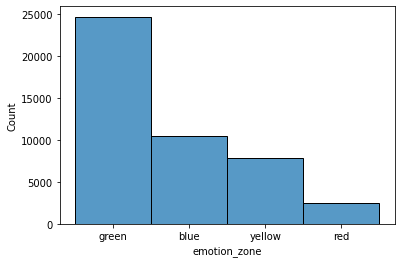

In [16]:
sns.histplot(parents_all_data_video_2d_eye['emotion_zone'])

<AxesSubplot:xlabel='eye_lmk_x_2', ylabel='Count'>

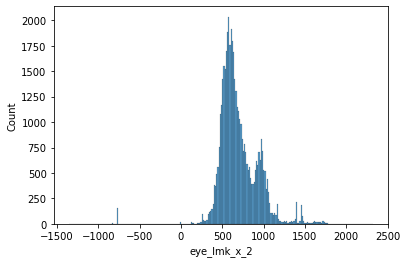

In [20]:
var = 'eye_lmk_x_2'
sns.histplot(parents_all_data_video_2d_eye[var])

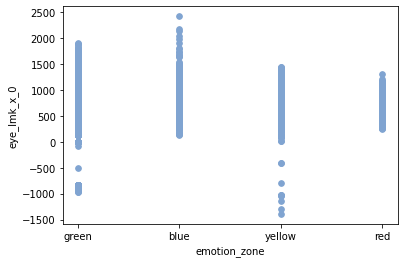

In [10]:
var = 'eye_lmk_x_0'
# data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
parents_all_data_video_2d_eye.plot.scatter(x='emotion_zone', y=var, s=32, c='#80a4d1');

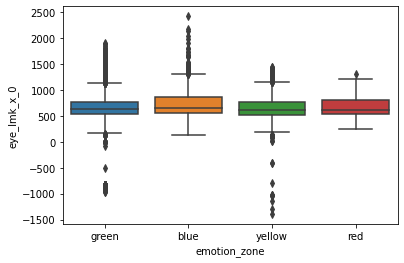

In [15]:
var = 'eye_lmk_x_0'
fig = sns.boxplot(x='emotion_zone', y=var, data=parents_all_data_video_2d_eye)
# fig.axis(ymin=0, ymax=800000);

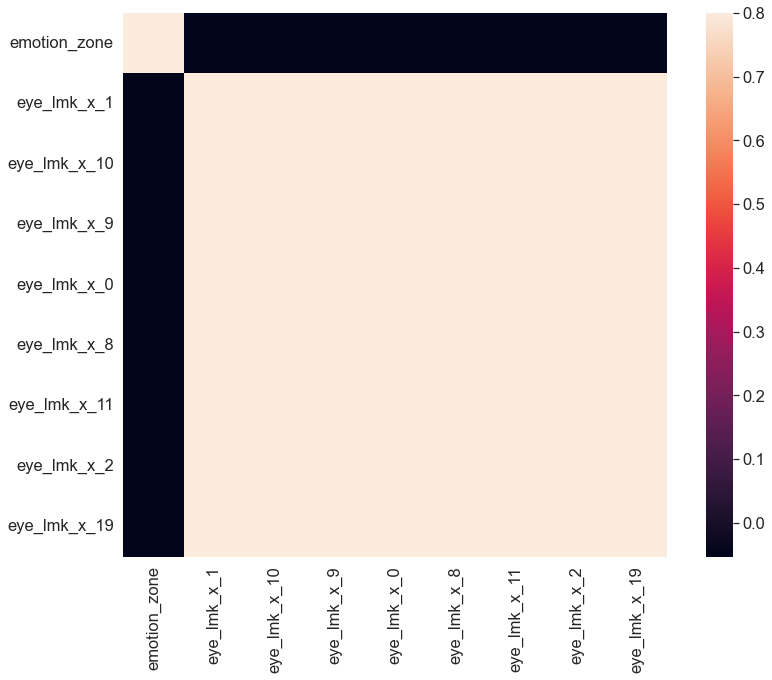

In [4]:
df_features = parents_all_data_video_2d_eye.iloc[:,4:]
df_features = pd.concat([parents_all_data_video_2d_eye['emotion_zone'], df_features], axis=1)

parents_all_data_video_2d_eye = represent_class_by_numbers(df_features)
                         
corrmat = parents_all_data_video_2d_eye.corr()
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'emotion_zone')['emotion_zone'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(parents_all_data_video_2d_eye[cols].corr(), vmax=.8, square=True);

In [5]:
corrmat

,emotion_zone,eye_lmk_x_0,eye_lmk_x_1,eye_lmk_x_2,eye_lmk_x_3,eye_lmk_x_4,eye_lmk_x_5,eye_lmk_x_6,eye_lmk_x_7,eye_lmk_x_8,...,eye_lmk_y_46,eye_lmk_y_47,eye_lmk_y_48,eye_lmk_y_49,eye_lmk_y_50,eye_lmk_y_51,eye_lmk_y_52,eye_lmk_y_53,eye_lmk_y_54,eye_lmk_y_55
emotion_zone,1.000000,-0.052742,-0.052433,-0.052993,-0.054079,-0.055075,-0.055520,-0.054866,-0.053756,-0.052867,...,-0.135413,-0.135776,-0.134917,-0.134633,-0.134676,-0.135007,-0.135418,-0.135673,-0.135644,-0.135335
eye_lmk_x_0,-0.052742,1.000000,0.999911,0.999440,0.998464,0.997749,0.997976,0.999164,0.999856,0.999085,...,0.395852,0.400968,0.414759,0.412156,0.412718,0.416085,0.420284,0.422839,0.422295,0.418953
eye_lmk_x_1,-0.052433,0.999911,1.000000,0.999738,0.998882,0.998126,0.998179,0.999151,0.999725,0.998815,...,0.399133,0.404168,0.417961,0.415403,0.415967,0.419293,0.423429,0.425938,0.425392,0.422093
eye_lmk_x_2,-0.052993,0.999440,0.999738,1.000000,0.999679,0.999157,0.999044,0.999443,0.999481,0.998078,...,0.408681,0.413487,0.426833,0.424410,0.424928,0.428052,0.431946,0.434316,0.433818,0.430725
eye_lmk_x_3,-0.054079,0.998464,0.998882,0.999679,1.000000,0.999852,0.999680,0.999477,0.998871,0.996904,...,0.418830,0.423390,0.436092,0.433818,0.434267,0.437144,0.440755,0.442973,0.442546,0.439704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eye_lmk_y_51,-0.135007,0.416085,0.419293,0.428052,0.437144,0.441331,0.439156,0.429625,0.420397,0.413646,...,0.998321,0.998812,0.999886,0.999860,0.999929,1.000000,0.999907,0.999756,0.999763,0.999868
eye_lmk_y_52,-0.135418,0.420284,0.423429,0.431946,0.440755,0.444783,0.442644,0.433388,0.424443,0.417900,...,0.997576,0.998246,0.999718,0.999584,0.999684,0.999907,1.000000,0.999959,0.999934,0.999885
eye_lmk_y_53,-0.135673,0.422839,0.425938,0.434316,0.442973,0.446925,0.444817,0.435718,0.426925,0.420422,...,0.997076,0.997887,0.999581,0.999366,0.999460,0.999756,0.999959,1.000000,0.999980,0.999857
eye_lmk_y_54,-0.135644,0.422295,0.425392,0.433818,0.442546,0.446551,0.444451,0.435297,0.426433,0.419777,...,0.997243,0.998073,0.999683,0.999462,0.999517,0.999763,0.999934,0.999980,1.000000,0.999928


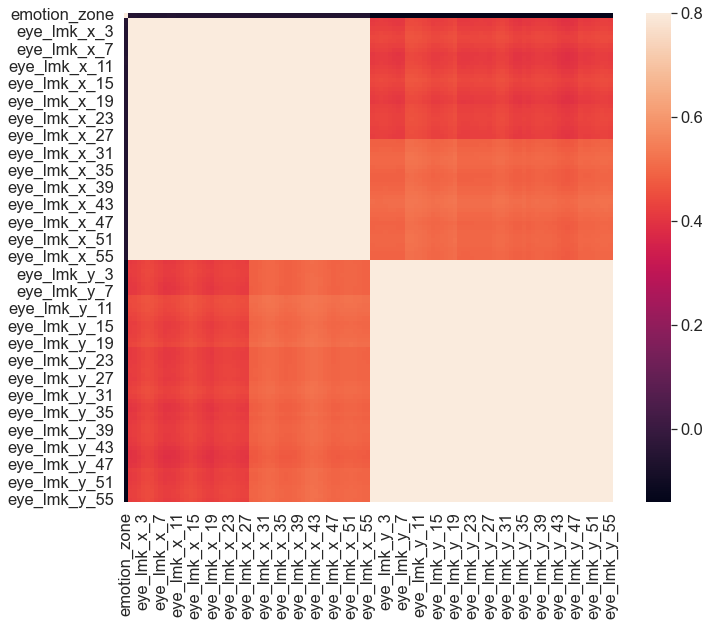

In [6]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Selection of Features for 2d_eye_landmark

Landmarks for x and y: 3, 7, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 51, 55